In [74]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910
Is directed graph: False
path lengtn: 0.1781512605042017


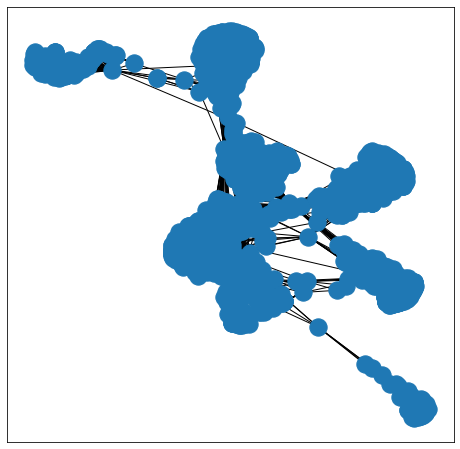

In [76]:
G = nx.read_edgelist('data/facebook_combined.txt')
print(nx.info(G))
print('Is directed graph:',nx.is_directed(G))
#print("average clustering:",nx.average_clustering(G2))
print('path lengtn:',nx.average_shortest_path_length(G2))
plt.figure(figsize=(8,8))
nx.draw_networkx(G,with_labels=False)

Name: 
Type: MultiDiGraph
Number of nodes: 35
Number of edges: 118
Average in degree:   3.3714
Average out degree:   3.3714
Is directed graph: True
path lengtn: 0.1781512605042017


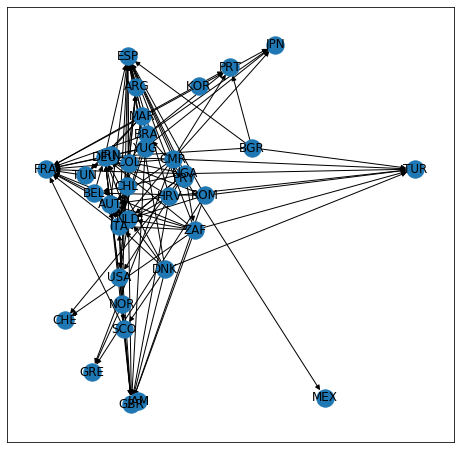

In [86]:
G2 = nx.read_pajek('data/football.net')
print(nx.info(G2))
print('Is directed graph:',nx.is_directed(G2))
#print("average clustering:",nx.average_clustering(G2))
print('path lengtn:',nx.average_shortest_path_length(G2))
plt.figure(figsize=(8,8))
nx.draw_networkx(G2)

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 10
Average degree:   4.0000
average clustering: 1.0
path lengtn: 1.0
Name: 
Type: Graph
Number of nodes: 10
Number of edges: 45
Average degree:   9.0000
average clustering: 1.0
path lengtn: 1.0
Name: 
Type: Graph
Number of nodes: 25
Number of edges: 300
Average degree:  24.0000
average clustering: 1.0
path lengtn: 1.0


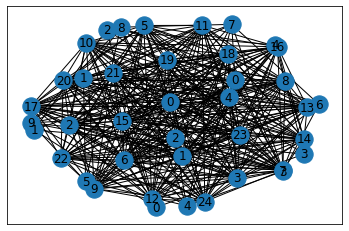

In [94]:

for i in [5,10,25]:
    G = nx.complete_graph(i)
    print(nx.info(G))
    print("average clustering:",nx.average_clustering(G))
    print('path lengtn:',nx.average_shortest_path_length(G))
    # plt.figure(figsize=(8,8))
    n  = nx.draw_networkx(G)
    plt.savefig(f'complete/complete_graph-{str(i)}.png')

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 5
Average degree:   2.0000
average clustering: 0.0
path lengtn: 1.5
Name: 
Type: Graph
Number of nodes: 10
Number of edges: 10
Average degree:   2.0000
average clustering: 0.0
path lengtn: 2.7777777777777777
Name: 
Type: Graph
Number of nodes: 25
Number of edges: 25
Average degree:   2.0000
average clustering: 0.0
path lengtn: 6.5


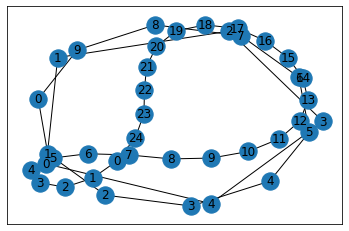

In [95]:
for i in [5,10,25]:
    G = nx.cycle_graph(i)
    print(nx.info(G))
    print("average clustering:",nx.average_clustering(G))
    print('path lengtn:',nx.average_shortest_path_length(G))
    # plt.figure(figsize=(8,8))
    n  = nx.draw_networkx(G)
    plt.savefig(f'cycle/cycle-{str(i)}.png')

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 2
Average degree:   0.8000
average clustering: 0.0
Name: 
Type: Graph
Number of nodes: 10
Number of edges: 11
Average degree:   2.2000
average clustering: 0.1
Name: 
Type: Graph
Number of nodes: 25
Number of edges: 62
Average degree:   4.9600
average clustering: 0.15380952380952378


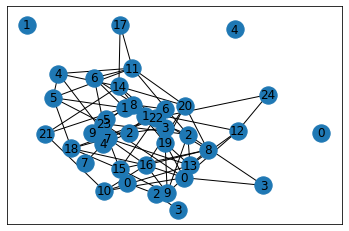

In [98]:
for i in [5,10,25]:
    G = nx.gnp_random_graph(i,p=0.2)
    print(nx.info(G))
    print("average clustering:",nx.average_clustering(G))
    #print('path lengtn:',nx.average_shortest_path_length(G))
    # plt.figure(figsize=(8,8))
    n  = nx.draw_networkx(G)
    plt.savefig(f'gnp/gnp-{str(i)}.png')

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 1
Average degree:   0.4000
average clustering: 0.0
Name: 
Type: Graph
Number of nodes: 10
Number of edges: 2
Average degree:   0.4000
average clustering: 0.0
Name: 
Type: Graph
Number of nodes: 25
Number of edges: 5
Average degree:   0.4000
average clustering: 0.0


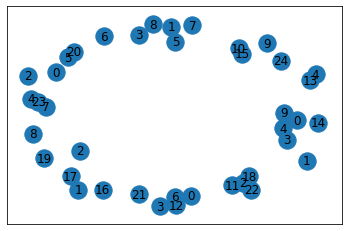

In [100]:
for i in [5,10,25]:
    G = nx.gnm_random_graph(i,m=i/5)
    print(nx.info(G))
    print("average clustering:",nx.average_clustering(G))
    #print('path lengtn:',nx.average_shortest_path_length(G))
    # plt.figure(figsize=(8,8))
    n  = nx.draw_networkx(G)
    plt.savefig(f'gnm/gnm-{str(i)}.png')

(1, 2)
(1, 3)
(1, 4)
(2, 3)
(2, 4)
(3, 4)


In [114]:
# this code is acually a bit different than the code I used to generate the plot, 
# I used google colabotory because have a shitty macbook

import timeit
from tqdm import tqdm
mysetup = "import networkx as nx"
  

x = []
p05 = []
p001 = []

for i in tqdm(range(1000,10000,25)):
    x.append(i)
    p05.append(timeit.timeit(setup = mysetup, 
                            stmt = f'G = nx.gnp_random_graph({i},p=0.5)', 
                            number = 100)/100)

for i in tqdm(range(0,10000,5)):    
    p001.append(timeit.timeit(setup = mysetup, 
                            stmt = f'G = nx.gnp_random_graph({i},p=0.01)', 
                            number = 100)/100)


  1%|          | 4/360 [00:04<06:57,  1.17s/it]


KeyboardInterrupt: 

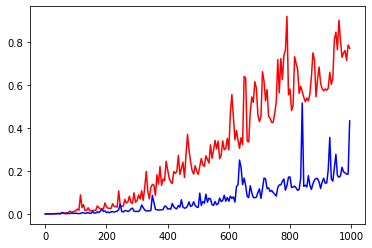

In [112]:
plt.ylabel('time t in seconds')
plt.xlabel('node number n')
plt.plot(x,p05,'r-',label='p=0.5')
plt.plot(x,p001,'b-',label='p=0.01')
plt.legend()
plt.show()